In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ExoMod as EM

## Modelling

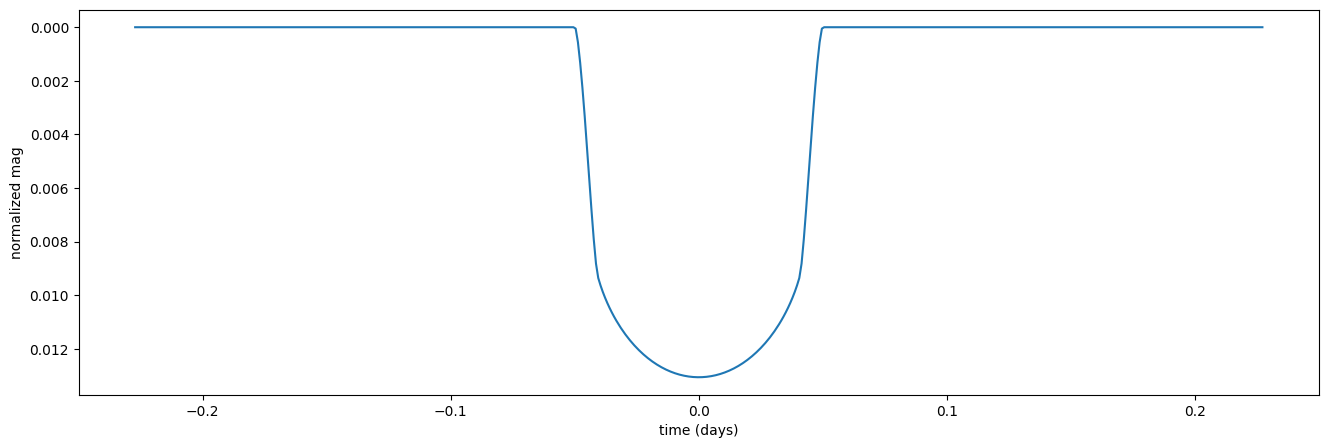

In [2]:
x1,y1 = EM.model_LD_field(0.1,0.2, 0.1, 0.5)
plt.figure(figsize=(16, 5))
plt.plot(x1,y1)
plt.xlabel('time (days)')
plt.ylabel('normalized mag')
plt.gca().invert_yaxis()
plt.show()

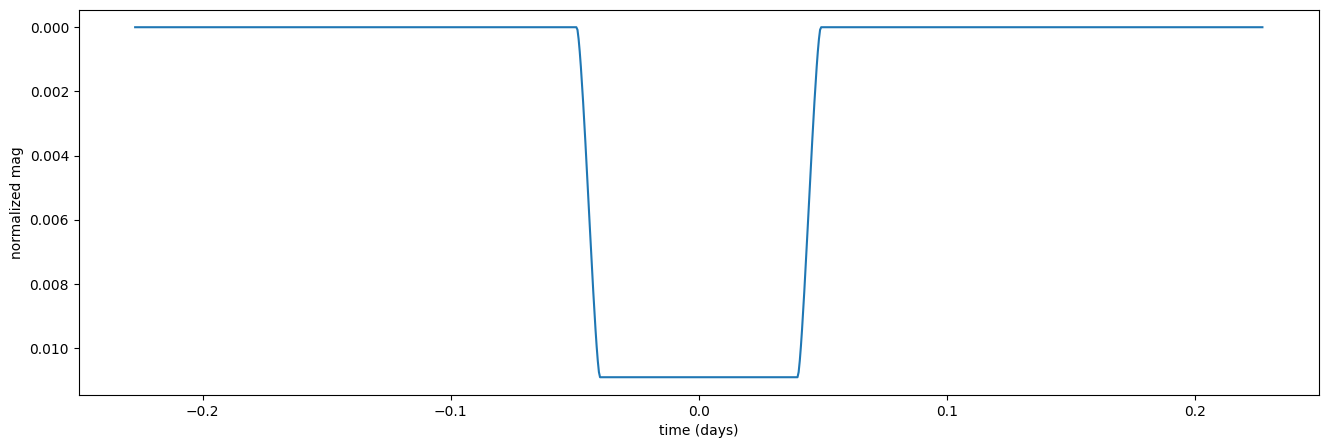

In [3]:
x3,y3 = EM.model(0.1,0.2, 0.1)
plt.figure(figsize=(16, 5))
plt.plot(x3,y3)
plt.xlabel('time (days)')
plt.ylabel('normalized mag')
plt.gca().invert_yaxis()
plt.show()

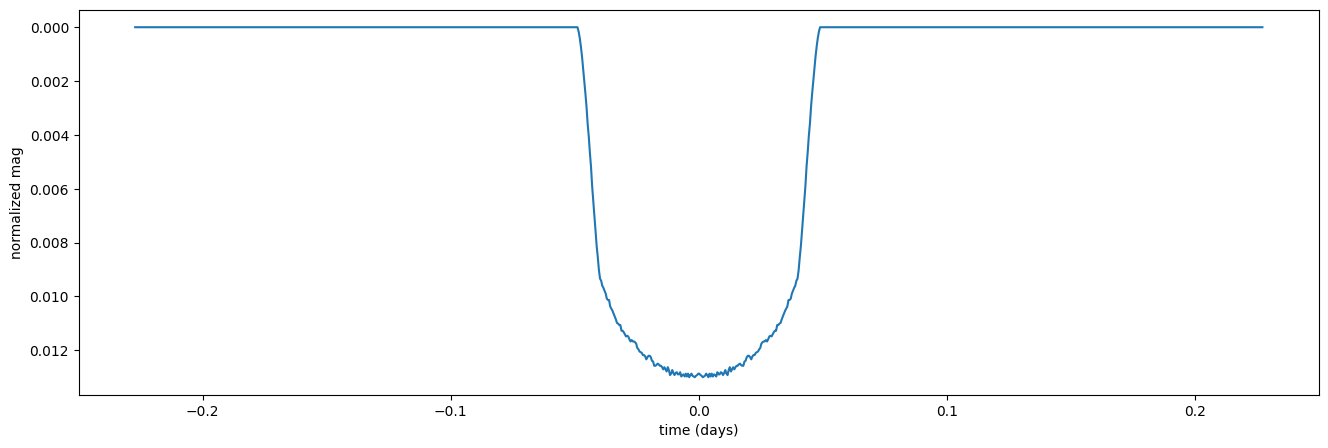

In [4]:
x1,y1 = EM.model_LD_points(0.1,0.2,0.1,0.5)
plt.figure(figsize=(16, 5))
plt.plot(x1,y1)
plt.xlabel('time (days)')
plt.ylabel('normalized mag')
plt.gca().invert_yaxis()
plt.show()

## Fitting

In [5]:
data=np.loadtxt(r"E:\project\Exoplanet Modelling\ETD Sample (R filter)\33.txt")
data_fix=[[],[],[]]
for i in range(126):
    data_fix[0].append(data[i][0])
    data_fix[1].append(data[i][1])
    data_fix[2].append(data[i][2])

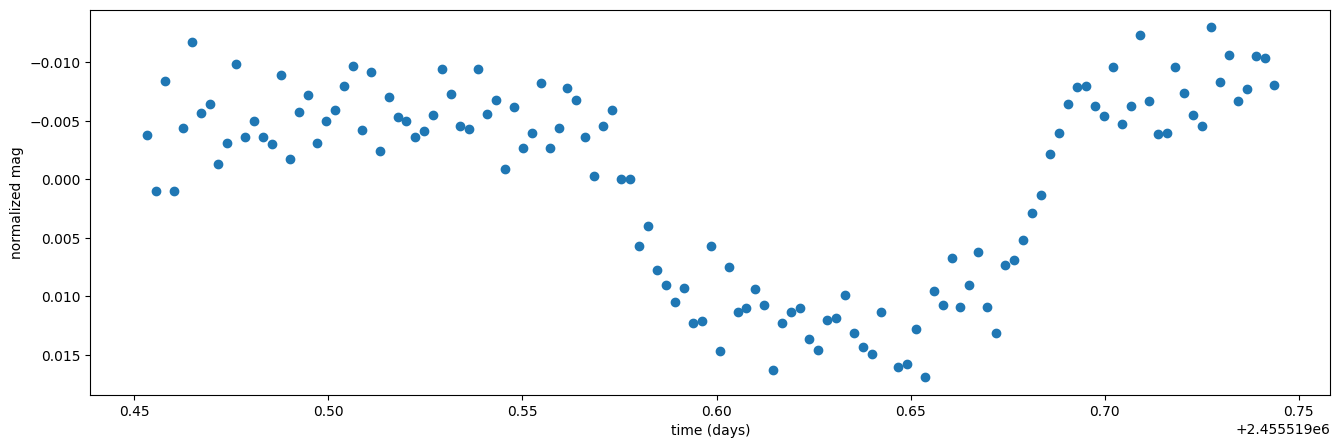

In [6]:
plt.figure(figsize=(16,5))
plt.scatter(data_fix[0],data_fix[1])
plt.xlabel('time (days)')
plt.ylabel('normalized mag')
plt.gca().invert_yaxis()
plt.show()

Best R_squared: 0.8939013271432256
Best parameters: [ 0.12687429  0.63316061  0.14833096  0.17727169 -0.00597752]


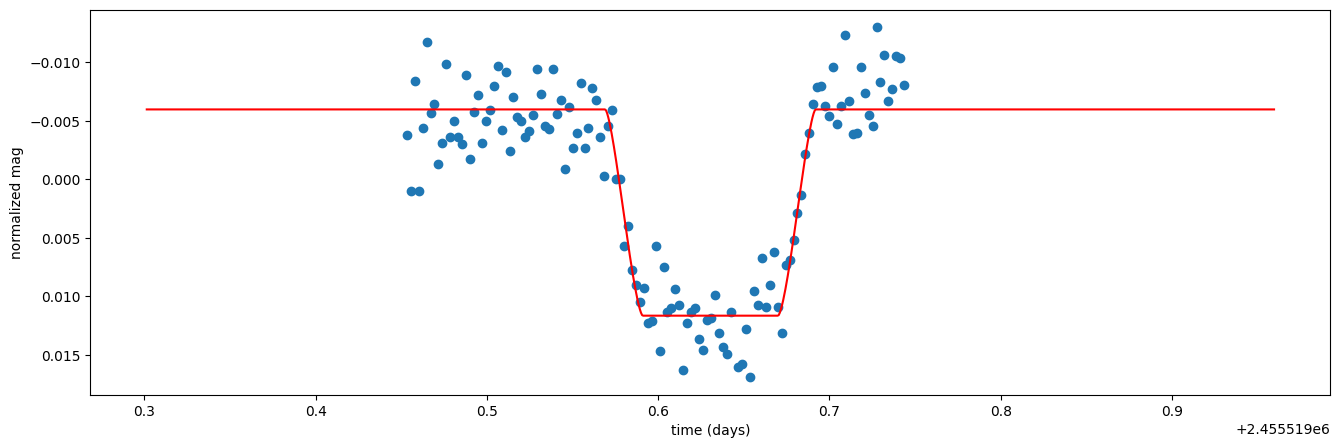

rasio=  0.1268742941825893
impact param=  0.6331606104614783
transit duration=  0.14833095735363713


In [7]:
x,y=EM.Fitting(data_fix[0],data_fix[1])

Best R_squared: -2877.0699088082247
Best parameters: [ 0.12706787  0.65028671  0.1511724   0.17724778 -0.00599621]
rasio=  0.12706786980939672
impact param=  0.6502867052377702
transit duration=  0.15117240052886352


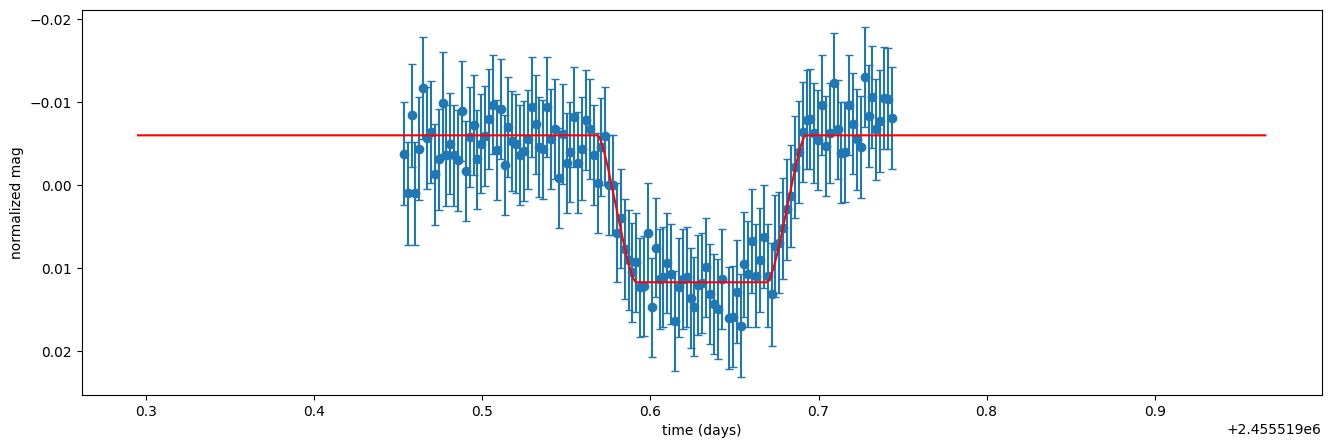

In [8]:
x,y=EM.FittingErr(data_fix[0],data_fix[1],data_fix[2])

## Stacking

### File reading 

33
40
41
107
245
284
290
295
298
300
308
313


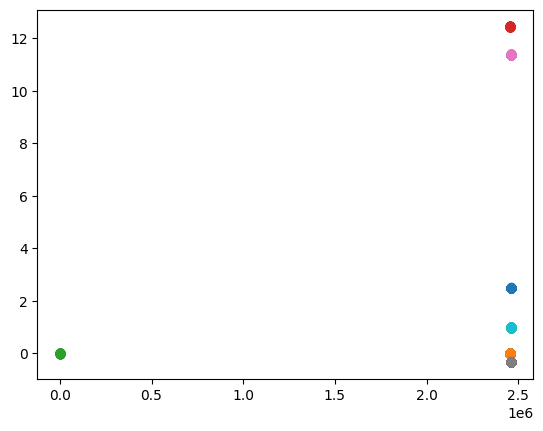

In [9]:
def read_nth_column(file_path, n):
    try:
        # Open the file in read mode
        with open(file_path, 'r') as file:
            # Read lines from the file
            lines = file.readlines()

            # Initialize an empty array to store the nth column values
            nth_column_values = []

            # Iterate through each line
            for line in lines:
                # Split the line into columns
                columns = line.split()

                # Check if the line has enough columns
                if len(columns) >= n:
                    # Extract the nth column and append it to the array
                    nth_column_values.append(columns[n - 1])

            return nth_column_values

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return []
def remove_spaces_and_convert(input_list):
    output_list = [eval(item.replace(' ', '')) for item in input_list]
    return output_list
def remove_spaces_and_convert2(input_list):
    output_list = [eval(''.join(char for char in item if char.isdigit() or char == '.')) for item in input_list]
    return output_list
fluxdata=[]
timedata=[]
namelist=[33,40,41,107,245,284,290,295,298,300,308,313]
for i in namelist:
    try:
        print(i)
        path=rf"E:\project\Exoplanet Modelling\ETD Sample (R filter)\{i}.txt"
        magdata = np.array(remove_spaces_and_convert(read_nth_column(path, 2)))
        JDdata = np.array(remove_spaces_and_convert(read_nth_column(path, 1)))
        timedata.append(JDdata)
        fluxdata.append(magdata)
        plt.scatter(JDdata,magdata)
    except:
        pass
for i in range(len(timedata)):
    if i==5 or i==8 or i==9:
        fluxdata[i]=-fluxdata[i]


### Stacking Feature

Best R_squared: 0.8938956838320038
Best parameters: [ 0.127043    0.66035259  0.15304522  0.17721203 -0.00599467]
Best R_squared: 0.9058687093739012
Best parameters: [ 0.12152112  0.42261736  0.12809597  0.21579185 -0.00469316]
Best R_squared: 0.9191898036140964
Best parameters: [ 0.12648467  0.69455917  0.17156029  0.14227089 -0.00181983]
Best R_squared: 0.958751678410744
Best parameters: [ 0.13040277  0.76421768  0.17877976  0.0902195  12.42758816]


e:\project\Exoplanet Modelling\ExoMod.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  v=2*(R1+R2)/t_transit
e:\project\Exoplanet Modelling\ExoMod.py:36: RuntimeWarning: invalid value encountered in scalar multiply
  flux_points2.append(uncovered_area(a,b,R1,(a1+v*time_sample[i]),b1+(impact*R1),R2))


Best R_squared: 0.9288231563824274
Best parameters: [ 0.1396657   0.71320673  0.17210476  0.10686484 -0.33149781]
Best R_squared: 0.979639386106578
Best parameters: [ 0.11757056  0.69871418  0.16377036  0.10607996 -1.00018077]
Best R_squared: 0.9296407029071436
Best parameters: [ 0.11990577  0.80511463  0.18926564  0.06260359 11.36126759]
Best R_squared: 0.8795531347284804
Best parameters: [ 0.12285484  0.67066915  0.16069931  0.1562147  -0.3292238 ]
Best R_squared: 0.9880910318917445
Best parameters: [ 0.12306217  0.69057051  0.165463    0.07860533 -1.00024021]
Best R_squared: 0.979824095387534
Best parameters: [ 0.11755643  0.66637489  0.15636056  0.07912135 -1.00000922]
Best R_squared: 0.9017692283967937
Best parameters: [0.12487118 0.67844402 0.15780288 0.07468992 2.48843852]


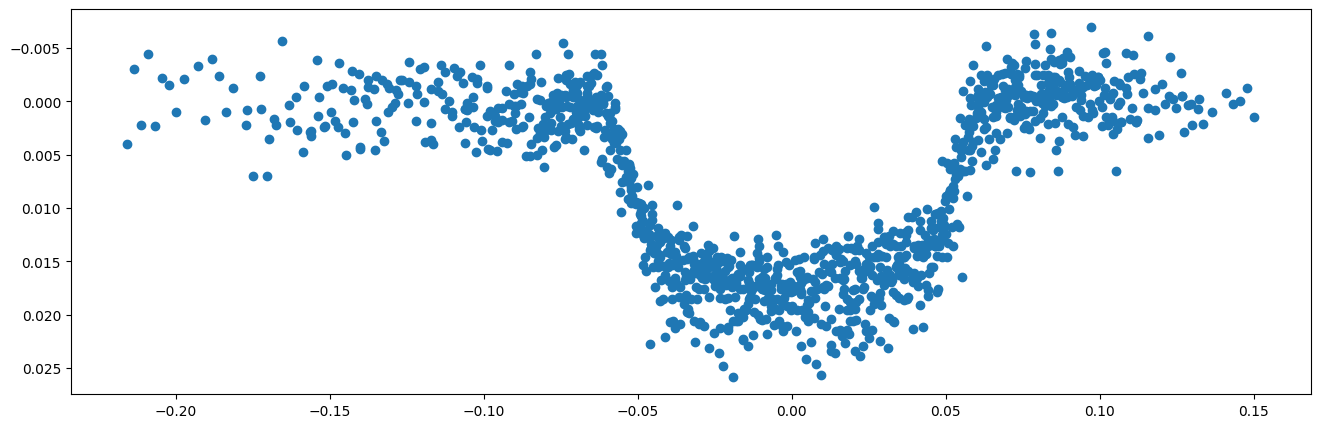

In [10]:
JD_all,mag_all=EM.Lightcurve_Stacking(timedata, fluxdata, visualize=True)